# I06-1 Experiment MM38126-1_Piamonteze
## 


**Users:** Cinthia Piamonteze

**Local Contact:** Dirk Backes

**Sample:** 

**Beamline setup:**
Magnet

**Experiment Description:**
Room temperature XMCD

**Logbook:**
[Google Docs Logbook]()


 - Data:  /dls/i06-1/data/2025/mm38126-1
 - Scripts:  /dls/i06-1/data/2025/mm38126-1/processing




In [4]:
%autosave 60
import h5py
import numpy as np
import matplotlib.pyplot as plt # Plotting
from collections import OrderedDict

Autosaving every 60 seconds


In [5]:
# Data directory
# bl.filedir = '/dls/i06-1/data/2025/mm38256-1'
# bl.savedir = '/dls/i06-1/data/2025/mm38256-1/processing'
workdirectory = ''



In [15]:
def read_file_fastfieldsweep(filename):
    hf = h5py.File(workdirectory + filename + '.nxs', 'r')

    d1 = hf['entry']['instrument']
    d2 = hf['entry']['ca61sr']

    meta = OrderedDict()
    meta['pola'] = d1['id']['polarisation'][()]

    main = OrderedDict()
    main['C1'] = d2['ca61sr'][()]
    main['C2'] = d2['ca62sr'][()]
    main['C3'] = d2['ca63sr'][()]
    main['C5'] = d2['ca65sr'][()]
    main['C8'] = d2['ca68sr'][()]
    main['h_z'] = d2['h_z'][()]

    TEY=main['C1']/main['C2']
    TFY=main['C3']/main['C2']
    TFY_90=main['C5']/main['C2']
    field_sign=np.sign(main['h_z'])
    field=main['C8']/1e7/0.0019968*0.056604* field_sign
    return field, TEY, TFY, TFY_90

def hyst_analysis(file_pc_dw,file_pc_up,file_nc_dw,file_nc_up,title):
    #pc
    filename = 'i06-1-'+str(file_pc_dw)
    field_pc_dw, TEY_pc_dw, TFY_pc_dw, TFY_90_pc_dw = read_file_fastfieldsweep(filename)
    filename = 'i06-1-'+str(file_pc_up)
    field_pc_up, TEY_pc_up, TFY_pc_up, TFY_90_pc_up  = read_file_fastfieldsweep(filename)

    #nc
    filename = 'i06-1-'+str(file_nc_dw)
    field_nc_dw, TEY_nc_dw, TFY_nc_dw, TFY_90_nc_dw = read_file_fastfieldsweep(filename)
    filename = 'i06-1-'+str(file_nc_up)
    field_nc_up, TEY_nc_up, TFY_nc_up, TFY_90_nc_up = read_file_fastfieldsweep(filename)

    # define equally spaced field array
    field_min = round(min(field_pc_dw))
    field_max = round(max(field_pc_dw))
    step = abs(field_pc_dw[-1])/len(field_pc_dw) ## MAYBE ERROR? Orignally [99]/100
    Npoints = int(round((field_max - field_min)/step))
    print(field_min,field_max, step)
    field_equally_up = np.linspace(field_min, field_max, Npoints)
    field_equally_dw = np.linspace(field_min, field_max, Npoints)

    # sort field
    sort_index_pc_dw = np.argsort(field_pc_dw)
    sort_index_pc_up = np.argsort(field_pc_up)
    sort_index_nc_dw = np.argsort(field_nc_dw)
    sort_index_nc_up = np.argsort(field_nc_up)

    # interpolate TFY to equally spaced field steps:
    TFY_pc_dw_interp = np.interp(field_equally_dw, field_pc_dw[sort_index_pc_dw],TFY_pc_dw[sort_index_pc_dw])
    TFY_pc_up_interp = np.interp(field_equally_up, field_pc_up[sort_index_pc_up],TFY_pc_up[sort_index_pc_up])
    TFY_nc_dw_interp = np.interp(field_equally_dw, field_nc_dw[sort_index_nc_dw],TFY_nc_dw[sort_index_nc_dw])
    TFY_nc_up_interp = np.interp(field_equally_up, field_nc_up[sort_index_nc_up],TFY_nc_up[sort_index_nc_up])
    TFY_diff_up = TFY_pc_up_interp - TFY_nc_up_interp
    TFY_diff_dw = TFY_pc_dw_interp - TFY_nc_dw_interp
    
     # interpolate TFY_90 to equally spaced field steps:
    TFY_90_pc_dw_interp = np.interp(field_equally_dw, field_pc_dw[sort_index_pc_dw],TFY_90_pc_dw[sort_index_pc_dw])
    TFY_90_pc_up_interp = np.interp(field_equally_up, field_pc_up[sort_index_pc_up],TFY_90_pc_up[sort_index_pc_up])
    TFY_90_nc_dw_interp = np.interp(field_equally_dw, field_nc_dw[sort_index_nc_dw],TFY_90_nc_dw[sort_index_nc_dw])
    TFY_90_nc_up_interp = np.interp(field_equally_up, field_nc_up[sort_index_nc_up],TFY_90_nc_up[sort_index_nc_up])
    TFY_90_diff_up = TFY_90_pc_up_interp - TFY_90_nc_up_interp
    TFY_90_diff_dw = TFY_90_pc_dw_interp - TFY_90_nc_dw_interp

    # interpolate TEY to equally spaced field steps:
    TEY_pc_dw_interp = np.interp(field_equally_dw, field_pc_dw[sort_index_pc_dw],TEY_pc_dw[sort_index_pc_dw])
    TEY_pc_up_interp = np.interp(field_equally_up, field_pc_up[sort_index_pc_up],TEY_pc_up[sort_index_pc_up])
    TEY_nc_dw_interp = np.interp(field_equally_dw, field_nc_dw[sort_index_nc_dw],TEY_nc_dw[sort_index_nc_dw])
    TEY_nc_up_interp = np.interp(field_equally_up, field_nc_up[sort_index_nc_up],TEY_nc_up[sort_index_nc_up])
    TEY_diff_up = TEY_pc_up_interp - TEY_nc_up_interp
    TEY_diff_dw = TEY_pc_dw_interp - TEY_nc_dw_interp
    
    #plot
#     fig, ax = plt.subplots(3,3,figsize=(9,10))
#     #pc tey
#     ax[0,0].plot(field_pc_dw,TEY_pc_dw,'--o',color='k',label='dw')
#     ax[0,0].plot(field_pc_up,TEY_pc_up,'--o',color='r',label='up')
#     ax[0,0].set_title('TEY c+')
#     m1=np.mean(TEY_pc_dw)
#     s1=np.std(TEY_pc_dw)
#     m2=np.mean(TEY_pc_up)
#     s2=np.std(TEY_pc_up)
#     lim1=min(m1-2*s1,m2-2*s2)
#     lim2=max(m1+2*s1,m2+2*s2)
#     ax[0,0].set_ylim([lim1,lim2])


#     # pc tfy
#     ax[0,1].plot(field_pc_dw,TFY_pc_dw,'--o',color='k',label='dw')
#     ax[0,1].plot(field_pc_up,TFY_pc_up,'--o',color='r',label='up')
#     ax[0,1].set_title('TFY c+')
#     m1=np.mean(TFY_pc_dw)
#     s1=np.std(TFY_pc_dw)
#     m2=np.mean(TFY_pc_up)
#     s2=np.std(TFY_pc_up)
#     lim1=min(m1-s1/1.5,m2-s2/1.5)
#     lim2=max(m1+s1/1.5,m2+s2/1.5)
#     ax[0,1].set_ylim([lim1,lim2])
    
#     # pc tfy_90
#     ax[0,2].plot(field_pc_dw,TFY_90_pc_dw,'--o',color='k',label='dw')
#     ax[0,2].plot(field_pc_up,TFY_90_pc_up,'--o',color='r',label='up')
#     ax[0,2].set_title('TFY 90 c+')
#     m1=np.mean(TFY_90_pc_dw)
#     s1=np.std(TFY_90_pc_dw)
#     m2=np.mean(TFY_90_pc_up)
#     s2=np.std(TFY_90_pc_up)
#     lim1=min(m1-s1/1.5,m2-s2/1.5)
#     lim2=max(m1+s1/1.5,m2+s2/1.5)
#     ax[0,2].set_ylim([lim1,lim2])

#     #nc tey
#     ax[1,0].plot(field_nc_dw,TEY_nc_dw,'--o',color='k',label='dw')
#     ax[1,0].plot(field_nc_up,TEY_nc_up,'--o',color='r',label='up')
#     ax[1,0].set_title('TEY c-')
#     m1=np.mean(TEY_nc_dw)
#     s1=np.std(TEY_nc_dw)
#     m2=np.mean(TEY_nc_up)
#     s2=np.std(TEY_nc_up)
#     lim1=min(m1-2*s1,m2-2*s2)
#     lim2=max(m1+2*s1,m2+2*s2)
#     ax[1,0].set_ylim([lim1,lim2])


#     # nc tfy
#     ax[1,1].plot(field_nc_dw,TFY_nc_dw,'--o',color='k',label='dw')
#     ax[1,1].plot(field_nc_up,TFY_nc_up,'--o',color='r',label='up')
#     ax[1,1].set_title('TFY c-')
#     m1=np.mean(TFY_nc_dw)
#     s1=np.std(TFY_nc_dw)
#     m2=np.mean(TFY_nc_up)
#     s2=np.std(TFY_nc_up)
#     lim1=min(m1-s1/1.5,m2-s2/1.5)
#     lim2=max(m1+s1/1.5,m2+s2/1.5)
#     ax[1,1].set_ylim([lim1,lim2])
    
#     # nc tfy_90
#     ax[1,2].plot(field_nc_dw,TFY_90_nc_dw,'--o',color='k',label='dw')
#     ax[1,2].plot(field_nc_up,TFY_90_nc_up,'--o',color='r',label='up')
#     ax[1,2].set_title('TFY 90 c-')
#     m1=np.mean(TFY_90_nc_dw)
#     s1=np.std(TFY_90_nc_dw)
#     m2=np.mean(TFY_90_nc_up)
#     s2=np.std(TFY_90_nc_up)
#     lim1=min(m1-s1/1.5,m2-s2/1.5)
#     lim2=max(m1+s1/1.5,m2+s2/1.5)
#     ax[1,2].set_ylim([lim1,lim2])

#     # diff tfy
#     ax[2,1].plot(field_equally_up, TFY_diff_up,'--o',color='r',label='up')
#     ax[2,1].plot(field_equally_dw, TFY_diff_dw,'--o',color='k',label='dw')
#     ax[2,1].set_title(title+' TFY')
#     m1=np.mean(TFY_diff_dw)
#     s1=np.std(TFY_diff_dw)
#     m2=np.mean(TFY_diff_up)
#     s2=np.std(TFY_diff_up)
#     lim1=min(m1-s1*2,m2-s2*2)
#     lim2=max(m1+s1*2,m2+s2*2)
#     ax[2,1].set_ylim([lim1,lim2])
    
#     # diff tfy_90
#     ax[2,2].plot(field_equally_up, TFY_90_diff_up,'--o',color='r',label='up')
#     ax[2,2].plot(field_equally_dw, TFY_90_diff_dw,'--o',color='k',label='dw')
#     ax[2,2].set_title(title+' TFY')
#     m1=np.mean(TFY_90_diff_dw)
#     s1=np.std(TFY_90_diff_dw)
#     m2=np.mean(TFY_90_diff_up)
#     s2=np.std(TFY_90_diff_up)
#     lim1=min(m1-s1*2,m2-s2*2)
#     lim2=max(m1+s1*2,m2+s2*2)
#     ax[2,2].set_ylim([lim1,lim2])


#     # diff tey
#     ax[2,0].plot(field_equally_up, TEY_diff_up,'--o',color='r',label='up')
#     ax[2,0].plot(field_equally_dw, TEY_diff_dw,'--o',color='k',label='dw')
#     ax[2,0].set_title(title+' TEY')
#     m1=np.mean(TEY_diff_dw)
#     s1=np.std(TEY_diff_dw)
#     m2=np.mean(TEY_diff_up)
#     s2=np.std(TEY_diff_up)
#     lim1=min(m1-s1*2,m2-s2*2)
#     lim2=max(m1+s1*2,m2+s2*2)
#     ax[2,0].set_ylim([lim1,lim2])


#     ax[0,0].legend()
#     ax[0,1].legend()
#     ax[1,0].legend()
#     ax[1,1].legend()
#     ax[2,1].legend()
#     ax[2,0].legend()
#     plt.tight_layout()

    
    plt.figure
    plt.plot(field_equally_up, TEY_diff_up)
    plt.plot(field_equally_dw, 1.03*TEY_diff_dw+0.28)
    

-1 0 0.021630080071592808


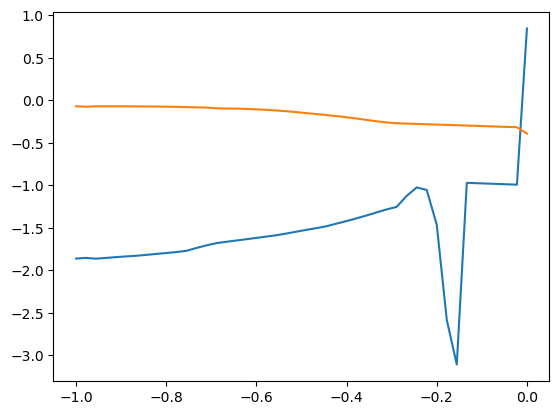

In [16]:
file_pc_dw = 347509
file_pc_up = 347510
file_nc_dw = 347511
file_nc_up = 347512
title = 'Cr 2K'
hyst_analysis(file_pc_dw,file_pc_up,file_nc_dw,file_nc_up,title)



In [12]:
file_pc_dw = 344402
file_pc_up = 344404
file_nc_dw = 344405
file_nc_up = 344407
title = 'Tb 110K'
hyst_analysis(file_pc_dw,file_pc_up,file_nc_dw,file_nc_up,title)



OSError: Unable to open file (unable to open file: name = '/dls/i06-1/data/2025/mm38256-1/i06-1-344402.nxs', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

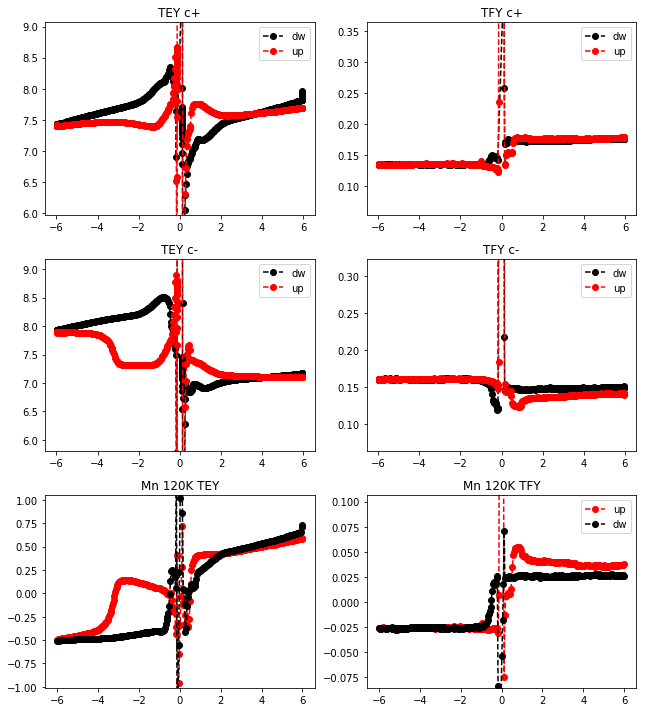

In [116]:
file_pc_dw = 344409
file_pc_up = 344410
file_nc_dw = 344411
file_nc_up = 344412
title = 'Mn 120K'
hyst_analysis(file_pc_dw,file_pc_up,file_nc_dw,file_nc_up,title)



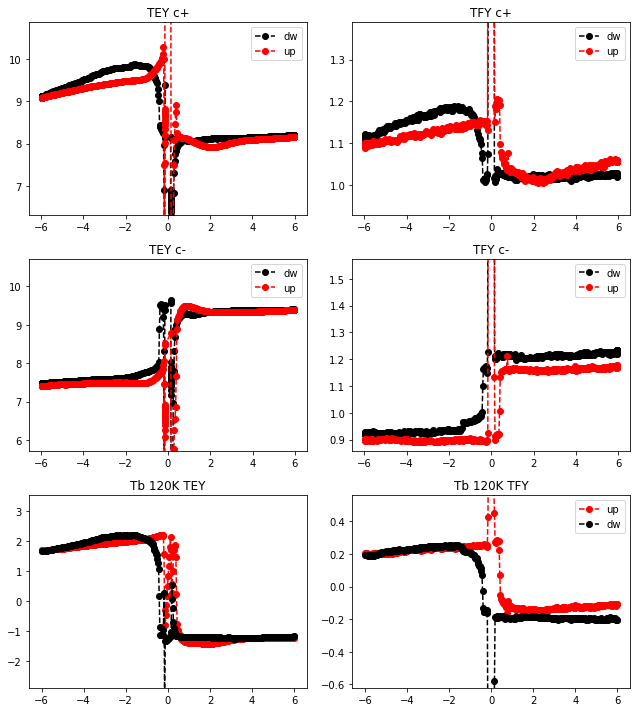

In [117]:
file_pc_dw = 344415
file_pc_up = 344417
file_nc_dw = 344418
file_nc_up = 344421
title = 'Tb 120K'
hyst_analysis(file_pc_dw,file_pc_up,file_nc_dw,file_nc_up,title)



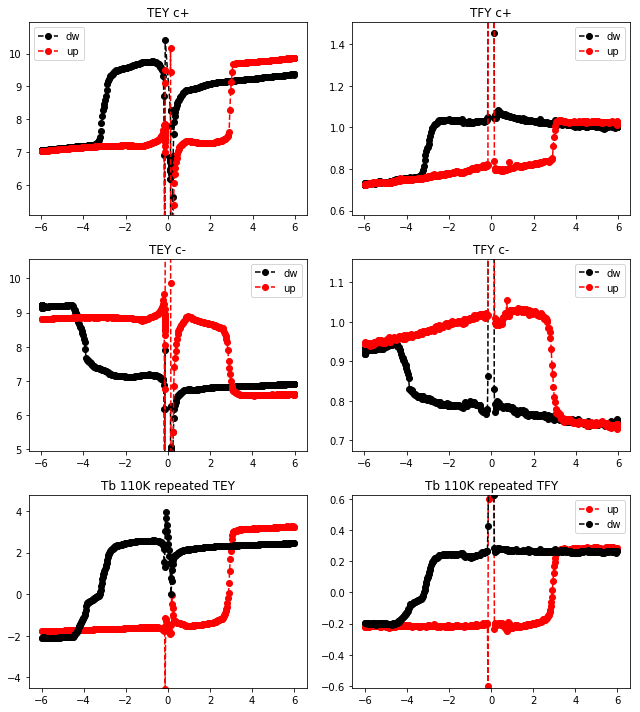

In [118]:
file_pc_dw = 344568
file_pc_up = 344569
file_nc_dw = 344571
file_nc_up = 344572
title = 'Tb 110K repeated'
hyst_analysis(file_pc_dw,file_pc_up,file_nc_dw,file_nc_up,title)



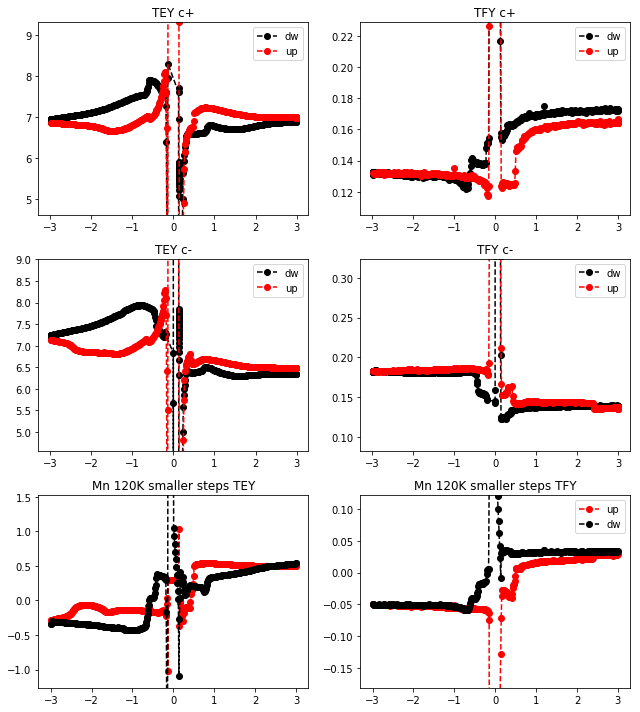

In [119]:
file_pc_dw = 344573
file_pc_up = 344574
file_nc_dw = 344575
file_nc_up = 344576
title = 'Mn 120K smaller steps'
hyst_analysis(file_pc_dw,file_pc_up,file_nc_dw,file_nc_up,title)



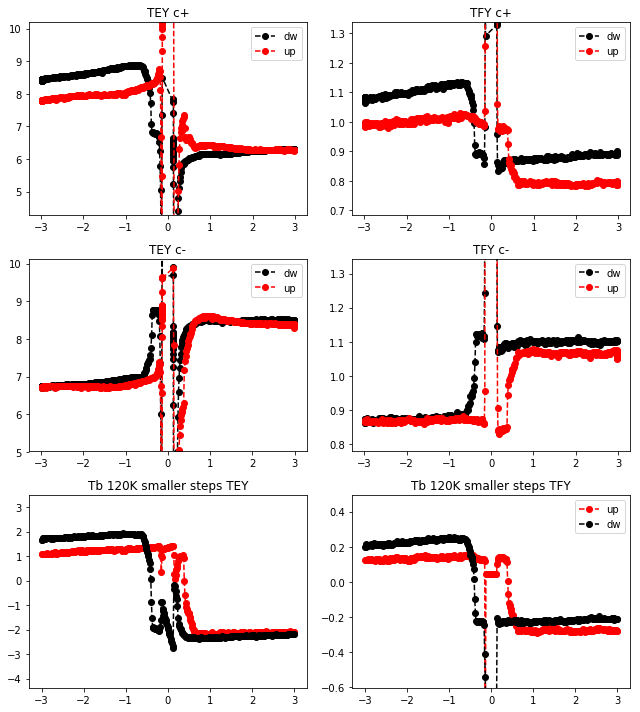

In [120]:
file_pc_dw = 344577
file_pc_up = 344578
file_nc_dw = 344579
file_nc_up = 344580
title = 'Tb 120K smaller steps'
hyst_analysis(file_pc_dw,file_pc_up,file_nc_dw,file_nc_up,title)

